In [3]:
# import the random module
import random
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import datetime
import requests
import time
import pandas as pd
from scipy.stats import linregress # this is for linear regression

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# add the lat and longs to a list
coordinates = list(lat_lngs)

In [6]:
# create a list for holding the cities
cities = []

# identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

630

In [7]:
# Starting URL for Weather Map API Call.
# import the API key
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        #print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

576

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buala,SB,2021-12-06 21:48:54,-8.1450,159.5921,82.33,80,100,6.02
1,Jamestown,US,2021-12-06 21:47:57,42.0970,-79.2353,36.99,66,90,24.00
2,Valdivia,CL,2021-12-06 21:48:55,-39.8142,-73.2459,70.57,52,1,5.75
3,Victoria,HK,2021-12-06 21:47:22,22.2855,114.1577,65.32,66,6,1.01
4,Hilo,US,2021-12-06 21:44:53,19.7297,-155.0900,79.29,90,90,9.22
5,Valparaiso,CL,2021-12-06 21:45:19,-33.0393,-71.6273,62.47,72,1,8.95
6,San Juan,AR,2021-12-06 21:46:32,-31.5375,-68.5364,88.52,30,45,19.46
7,Sretensk,RU,2021-12-06 21:48:56,52.2453,117.7093,2.80,97,37,1.28
8,Hermanus,ZA,2021-12-06 21:48:56,-34.4187,19.2345,59.90,76,5,1.74
9,Tuktoyaktuk,CA,2021-12-06 21:48:56,69.4541,-133.0374,8.60,78,75,13.80


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [15]:
# get today's date in seconds
today = time.strftime('%x')
today

'12/06/21'

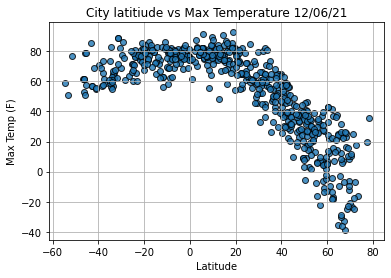

In [18]:
# build the scatter plot for lat vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o',
            alpha = 0.8,
            label = 'Cities'
           )

plt.title(f'City latitiude vs Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save fig
plt.savefig('weather_data/Fig1.png')

plt.show()

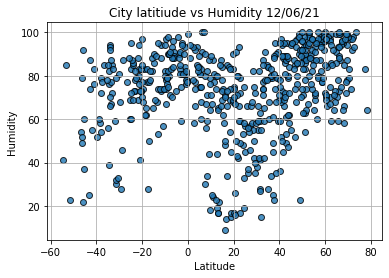

In [20]:
# build the scatter plot for lat vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o',
            alpha = 0.8,
            label = 'Cities'
           )

plt.title(f'City latitiude vs Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# save fig
plt.savefig('weather_data/Fig2.png')

plt.show()

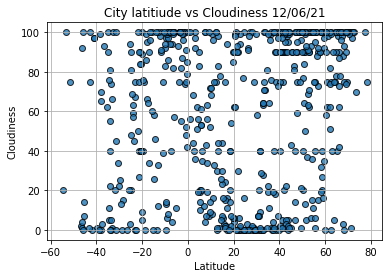

In [22]:
# build the scatter plot for lat vs Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o',
            alpha = 0.8,
            label = 'Cities'
           )

plt.title(f'City latitiude vs Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# save fig
plt.savefig('weather_data/Fig3.png')

plt.show()

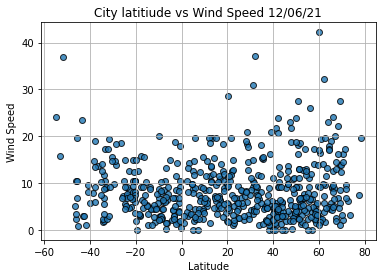

In [24]:
# build the scatter plot for lat vs Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o',
            alpha = 0.8,
            label = 'Cities'
           )

plt.title(f'City latitiude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# save fig
plt.savefig('weather_data/Fig4.png')

plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

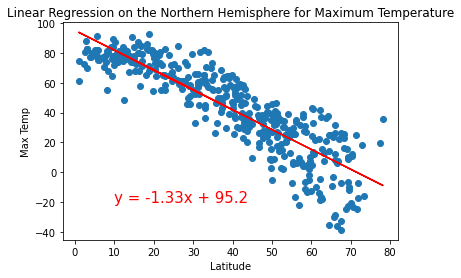

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))

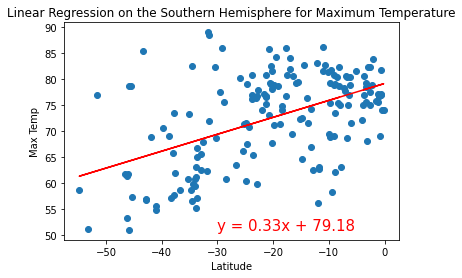

In [57]:
# linear regression on the southern hemi
# call the function
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Max Temp'],
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',
                       (-30,51)
                      )

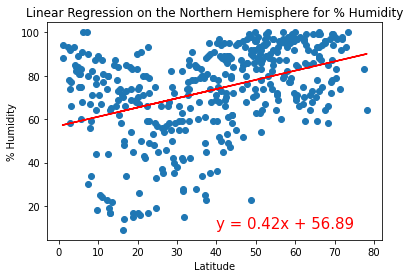

In [56]:
# linear regression on the northern hemi
# call the function
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Humidity'],
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',
                       (40,10)
                      )

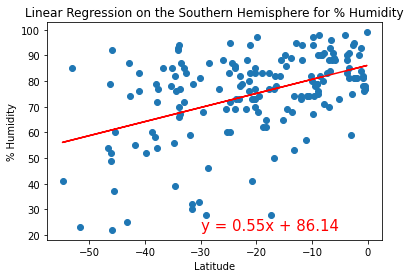

In [55]:
# linear regression on the southern hemi
# call the function
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Humidity'],
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',
                       (-30,22)
                      )

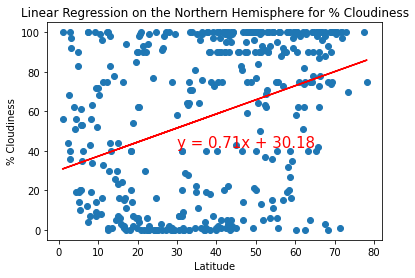

In [54]:
# linear regression on the northern hemi
# call the function
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Cloudiness'],
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',
                       (30,42)
                      )

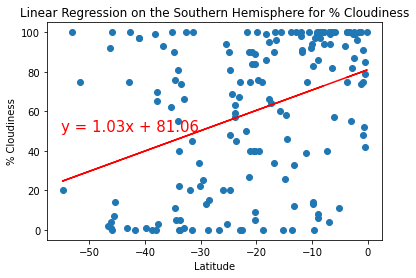

In [53]:
# linear regression on the southern hemi
# call the function
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Cloudiness'],
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',
                       (-55,50)
                      )

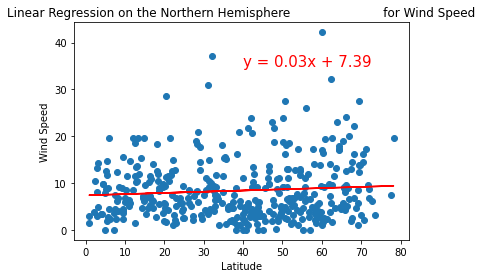

In [50]:
# linear regression on the northern hemi
# call the function
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Wind Speed'],
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed',
                       'Wind Speed',
                       (40,35)
                      )

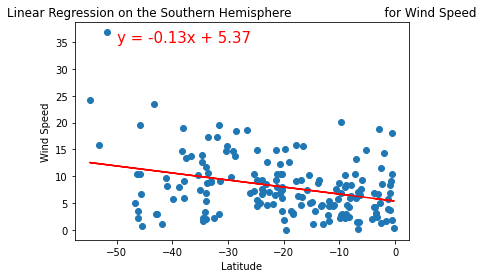

In [51]:
# linear regression on the southern hemi
# call the function
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Wind Speed'],
                       'Linear Regression on the Southern Hemisphere \
                       for Wind Speed',
                       'Wind Speed',
                       (-50,35)
                      )